SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Support vector machine Accuracy : 
 50.0 %



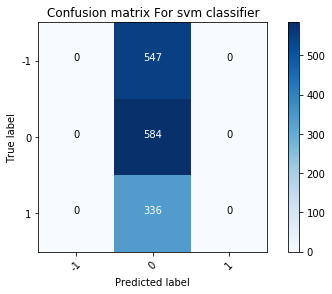

In [2]:
import json
import pandas as pd
#import time
import numpy as np
import itertools

import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
#from sklearn.metrics import roc_auc_score

tweets_data = []
x = []
y = []

#Word Counts with CountVectorizer. 
#The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words,
#but also to encode new documents using that vocabulary.
#You can use it as follows: Create an instance of the CountVectorizer class
vectorizer = CountVectorizer(stop_words='english')
# remove English stop words
#print(vectorizer)

def retrieveTweet(data_path):

    tweets_data_path = data_path
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')          

             
def retrieveProcessedData(Pdata_path):
    sent = pd.read_excel(Pdata_path)
    for i in range(len(tweets_data)):
        if tweets_data[i]['id']==sent['id'][i]:
             #X CONTAIN THE ORIGINAL TWEET
            x.append(tweets_data[i]['text'])
            y.append(sent['sentiment'][i])
           # print(y)
            #print(x)
            
def svm():
    from sklearn.svm import SVC
    #print(SVC)
    #start_timesvm = time.time()
    train_featuressvm = vectorizer.fit_transform(x)
    actual2 = y
    test_features2 = vectorizer.transform(x)
    svc = SVC()
    
    print(svc)
    svc = svc.fit(train_featuressvm, [int(r) for r in y])
    prediction2 = svc.predict(test_features2)
    sss, vvv, thresholds = metrics.roc_curve(actual2, prediction2, pos_label=1)
    svc = format(metrics.auc(sss, vvv))
    svc = float(svc)*100
    print("Support vector machine Accuracy : \n", svc, "%")
    #print(" Completion Speed", round((time.time() - start_timesvm),5))
    print()

     
    nb_matrix = confusion_matrix(actual2, prediction2 )
    #The diagonal elements of the confusion matrix represent the number 
    #of points for which the predicted label is equal to the true label,
    
    #print(nb_matrix)
    plt.figure()
    plot_confusion_matrix(nb_matrix, classes=[-1,0,1],title='Confusion matrix For svm classifier')



def runall():     
    retrieveTweet('datacheck/tweetdatacheck.txt')  
    retrieveProcessedData('processed_datacheck/output.xlsx')
    svm()
   # plot_confusion_matrix(nb_matrix,classes=[-1,0,1])

runall()